In [60]:
import networkx as nx
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx

def min_set_max_cut(G, verbose = False):
    G.add_edges_from([(u, v, {'sign': 1}) for u, v in G.edges]) # Set the positive relationship for all the edges
    sampler = EmbeddingComposite(DWaveSampler())
    max_cut = dnx.maximum_cut(G, sampler)
    max_cut_complementary = []
    for node in G.nodes:
        if node not in max_cut:
            max_cut_complementary.append(node)
            G.nodes[node]['color'] = 0
        else:
            G.nodes[node]['color'] = 1
    if verbose:
        print("Len of Max-Cut:", len(max_cut))
        print("Len of Complementary Max-Cut:", len(max_cut_complementary))
    
    if len(max_cut) < len(max_cut_complementary):
        return len(max_cut)
    else:
        return len(max_cut_complementary)

    

The minimum set is: 5


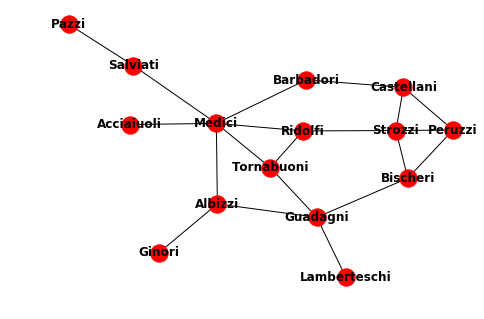

In [61]:
# Florentine Families Graph

num_shots = 10
dwave_samples = []
florentine_families = nx.florentine_families_graph() 
nx.draw(florentine_families, with_labels=True, font_weight='bold')
for _ in range(num_shots):
    dwave_samples.append(min_set_max_cut(G=florentine_families))

print('The minimum set is:', min(dwave_samples))

The minimum set is: 9


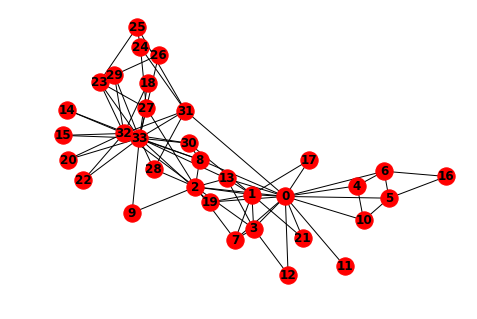

In [62]:
# Karate Club Graph
num_shots = 10
dwave_samples = []
karate_club = nx.karate_club_graph() 
nx.draw(karate_club, with_labels=True, font_weight='bold')
for _ in range(num_shots):
    dwave_samples.append(min_set_max_cut(G=karate_club))

print('The minimum set is:', min(dwave_samples))

The minimum set is: 14


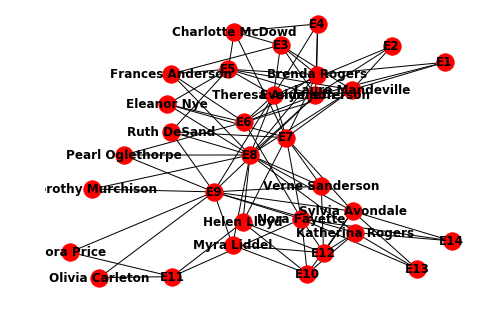

In [63]:
# Davis Southern Women Club Graph
num_shots = 10
dwave_samples = []
davis_southern_women = nx.davis_southern_women_graph() 
nx.draw(davis_southern_women, with_labels=True, font_weight='bold')
for _ in range(num_shots):
    dwave_samples.append(min_set_max_cut(G=davis_southern_women))

print('The minimum set is:', min(dwave_samples))